In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Augmentation Potential for Mental, Collaborative, and Unpredictable Tasks

This notebook will present the results of odds ratios calculated using logistic regression to assess the augmentation potential of tasks. The regression model is specified as follows:

Augmentation
∼
Mental
+
Collaborative
+
Unpredictable




Figure 1 B

## Loading GPT responses

In [3]:

categories = ['disruptive', 'consolidating', 'notexposed']
types = ['consistency', 'automation', 'mental','how']  

dataframes = {}

for category in categories:
    for dtype in types:
        key = f'{category}_represent_{dtype}'
        file_path = f'../data/processed/GPT_Whole_Tasks/finalized_gpt_responses_wholetasks_{category}_{dtype}_082724.csv'
        dataframes[key] = pd.read_csv(file_path)

       
        

In [6]:
whole_consistency = pd.concat( [dataframes['disruptive_represent_consistency'], dataframes['consolidating_represent_consistency'], dataframes['notexposed_represent_consistency']])
whole_mental = pd.concat( [dataframes['disruptive_represent_mental'], dataframes['consolidating_represent_mental'], dataframes['notexposed_represent_mental']])
whole_how = pd.concat( [dataframes['disruptive_represent_how'], dataframes['consolidating_represent_how'], dataframes['notexposed_represent_how']])
whole_impact = pd.concat( [dataframes['disruptive_represent_automation'], dataframes['consolidating_represent_automation'], dataframes['notexposed_represent_automation']])


In [7]:
all_response_final = pd.concat([whole_consistency, whole_mental , whole_how ,whole_impact],axis=1)




In [8]:
formula = 'C(impact, Treatment("HWA")) ~ C(mental, Treatment("M")) + C(how, Treatment("T")) + C(consistency, Treatment("V"))'

# Using patsy to create design matrices
from patsy import dmatrices
y, X = dmatrices(formula, all_response_final, return_type='dataframe')

# Fit the multinomial logistic regression model
model = sm.MNLogit(y, X)
result = model.fit()

# Print the summary of the regression
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.317153
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 1866
Model:                        MNLogit   Df Residuals:                     1862
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Aug 2024   Pseudo R-squ.:                  0.5194
Time:                        15:32:25   Log-Likelihood:                -591.81
converged:                       True   LL-Null:                       -1231.5
Covariance Type:            nonrobust   LLR p-value:                4.364e-277
 y=C(impact, Treatment("HWA"))[HWS]       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                              -3.7742      0.210 

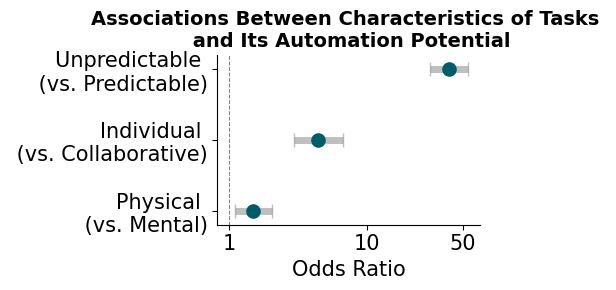

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Data
categories = ["Physical \n (vs. Mental)", "Individual \n (vs. Collaborative)", "Unpredictable \n (vs. Predictable)"]
coef = [0.4025, 1.4940, 3.6835]
std_err = [0.157, 0.207, 0.164]
p_values = [0.01, 0.00, 0.00]
odds_ratios = np.exp(coef)

# Confidence intervals
lower_ci = np.exp(np.array(coef) - 1.96 * np.array(std_err))
upper_ci = np.exp(np.array(coef) + 1.96 * np.array(std_err))

# Creating a DataFrame for easier plotting
df = pd.DataFrame({
    'Task Characteristics': categories,
    'Odds Ratio': odds_ratios,
    'Lower CI': lower_ci,
    'Upper CI': upper_ci,
    'p-value': p_values
})

# Plotting
plt.figure(figsize=(5, 3))

# Horizontal line at odds ratio of 1 (log scale)
# Horizontal line at odds ratio of 1 (log scale)
plt.axvline(1, color='grey', linestyle='--', linewidth=0.75)

# Error bars in grey
plt.errorbar(df['Odds Ratio'], df['Task Characteristics'], 
             xerr=[df['Odds Ratio'] - df['Lower CI'], df['Upper CI'] - df['Odds Ratio']], 
             fmt='o', color='grey', alpha=0.5,ecolor='grey', linewidth=5,capsize=5, markersize=5)

# Overlay yellow dots
plt.scatter(df['Odds Ratio'], df['Task Characteristics'], color='#005C69', s=90, zorder=3)
plt.xscale('log')
plt.xticks([1,10,50], [1,10,50])

# Adding p-values as text
# for i, row in df.iterrows():
#     plt.text(row['Odds Ratio'], i, f'p={row["p-value"]:.3f}', va='center', ha='left', fontsize=10)

# Customizing the plot
plt.xlabel('Odds Ratio', fontsize=15)
plt.title('Associations Between Characteristics of Tasks \n and Its Automation Potential', fontsize=14, weight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.grid(False)
sns.despine()
plt.ylim([-0.2,2.2])

axes = plt.gca()


plt.minorticks_off()

# Annotations for model fit
# plt.annotate("Model p < 0.001\nPseudo R^2 = 0.384", xy=(1, 0.7), xytext=(1, 0.2),
#              textcoords='axes fraction', fontsize=15, ha='center', va='center')

plt.tight_layout()
# plt.savefig('../../results/figures/validation_rubric_logistic_regression.png',bbox_inches = 'tight')
plt.show()
